<a href="https://colab.research.google.com/github/cs20m016/cs6910-Assignment-1/blob/main/VanilaGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec
from random import randint
from random import random
from random import seed
import math
from sklearn.utils import shuffle

In [2]:
from keras.datasets import fashion_mnist
train_data,test_data=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_data_mean = np.mean(train_data[0])
train_data_stdev = np.std(train_data[0])
train_data = ((train_data[0] - train_data_mean) / train_data_stdev, train_data[1])
test_data = ((test_data[0] - train_data_mean) / train_data_stdev, test_data[1])
train_X, trainY = train_data
test_X, testY = test_data

In [4]:
train_X, trainY = shuffle(train_X, trainY)
test_X, testY = shuffle(test_X, testY)

In [5]:
print('Train: X=%s, y=%s' %(train_X.shape,trainY.shape))
print('Test: X=%s, y=%s' %(test_X.shape,testY.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [6]:
class_label=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
sample=[]
for label in range(10):
    for i in range(len(testY)):
        if label==testY[i]:
            sample.append(test_X[i])
            break

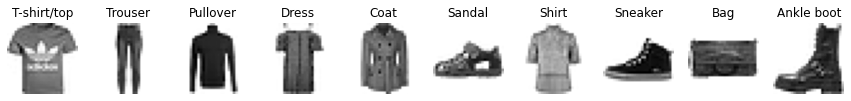

In [8]:
fig=plt.figure(figsize=(15,15))
rows=1
columns=10
for i in range(1, columns*rows +1):
    tg=sample[i-1]
    ax=fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(tg,cmap=plt.cm.binary)
    ax.title.set_text(class_label[i-1])
plt.show()

In [9]:
trainX=[train_X[i].flatten() for i in range(len(train_X))]
print(np.shape(trainX))
print(np.shape(trainY))

(60000, 784)
(60000,)


In [10]:
testX=[test_X[i].flatten() for i in range(len(test_X))]
print(np.shape(testX))
print(np.shape(testY))

(10000, 784)
(10000,)


In [11]:
train_samples=len(trainX)
test_samples=len(testX)
xlen=len(trainX[0])
print(xlen)

784


In [12]:
def initialize_weights(n_input, n_hidden_layer, n_output,neurons_hl):
    W = list()
    W.append([[np.random.normal() for j in range(n_input)]for i in range(neurons_hl)])
    for i in range(n_hidden_layer-1):
        W.append([[np.random.normal() for j in range(neurons_hl)]for i in range(neurons_hl)])
    W.append([[np.random.normal() for j in range(neurons_hl)]for i in range(n_output)])
    return W

In [13]:
def initialize_bias(n_input, n_hidden_layer, n_output,neurons_hl):
    B=list()
    for i in range(n_hidden_layer):
        B.append([np.random.normal() for i in range(neurons_hl)])
    B.append([np.random.normal() for i in range(n_output)])
    return B

In [14]:
def sigmoid(b):
  a=np.array(b,dtype=np.float128)
  h=list()
  for el in a:
    h.append(1/(1+np.exp(-el)))
  return h

In [15]:
def softmax(b):
  a=np.array(b,dtype=np.float128)
  h=list()
  sum=0
  for el in a:
    sum+=np.exp(el)
  for el in a:
    h.append(np.exp(el)/sum)
  return h

In [16]:
def feed_forward(input,W,B,L):
    H=list()
    A=list()
    H.append(input)
    A.append([0])
    h=input
    for i in range(1,L):
        a=B[i-1]+np.matmul(W[i-1],H[i-1])
        A.append(a)
        h=sigmoid(a)
        H.append(h)
    a=B[L-1]+np.matmul(W[L-1],H[L-1])
    A.append(a)
    hL=softmax(a)
    H.append(hL)
    return H,A,hL

In [18]:
def cmp(e):
  g=1/(1+np.exp(-e))
  return g*(1-g)

In [19]:
def diff_sigmoid(a):
    res=list()
    for el in a:
      res.append(cmp(el))
    return res

In [21]:
def back_propogation(H,A,y_hat,label,W):
    W_grad=list()
    B_grad=list()
    one_hot_y=np.zeros(K)
    one_hot_y[label]+=1
    ak_grad = y_hat-one_hot_y
    for k in range(L,0,-1):
        w_grad=np.matmul(np.matrix(ak_grad).T,np.matrix(H[k-1]))
        W_grad.append(w_grad)
        B_grad.append(ak_grad)
        if k != 1:
            h_grad=np.matmul(np.transpose(W[k-1]),ak_grad)
            ak_grad=np.multiply(h_grad,diff_sigmoid(A[k-1]))
    return W_grad,B_grad

In [22]:
L=3 #No of Layers
N=8 #size of each hidden layer
K=10 #No of classes
eta=0.0001 #Learning rate

In [23]:
def gradient_descent():
    t=0
    max_iterations=15
    error=0.0
    W= initialize_weights(xlen,L-1,K,N)
    B= initialize_bias(xlen,L-1,K,N)
    loss=list()
    while (t<max_iterations):
        wgrad=list()
        bgrad=list()
        for l in range(L):
            wgrad.append(np.zeros(shape=np.shape(W[l])).tolist())
            bgrad.append(np.zeros(shape=np.shape(B[l])).tolist())
        for i in range(train_samples):
            H,A,y_hat=feed_forward(trainX[i],W,B,L)
            error+=(-math.log(y_hat[trainY[i]]))
            W_grad,B_grad=back_propogation(H,A,y_hat,trainY[i],W)
            W_grad=W_grad[::-1]
            B_grad=B_grad[::-1]
            for l in range(L):
                wgrad[l]=np.add(wgrad[l],W_grad[l]).tolist()
                bgrad[l]=np.add(bgrad[l],B_grad[l]).tolist()
        for l in range(L):
            W[l]=(np.matrix(W[l])-np.multiply(eta,wgrad[l])).tolist()
            B[l]=np.subtract(B[l],np.multiply(eta,bgrad[l])).tolist()       
        loss.append(error/train_samples)
        error=0.0
        t=t+1
        print('Epoch',t)
    return W,B,loss

In [24]:
W_r,B_r,loss=gradient_descent()

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15


Text(0.5, 1.0, 'Train Loss- VanilaGD')

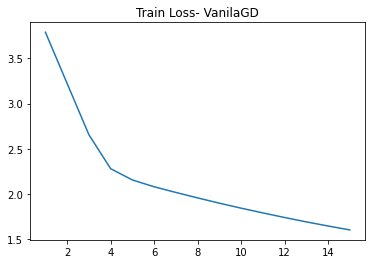

In [25]:
plt.plot(np.arange(1,len(loss)+1),loss)
plt.title('Train Loss- VanilaGD')

In [26]:
#Prediction
valid=0
predict=[]
for i in range(test_samples):
    H,A,y_hat = feed_forward(testX[i],W_r,B_r,L)
    class_predict = y_hat.index(max(y_hat))
    predict.append(class_predict)
    if(class_predict==testY[i]):
      valid+=1

In [ ]:
valid

4542